# TD1: Linear and Polynomial Regressions; Application to Classification

In [149]:
import numpy as np
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt

## Linear and polynomial regression: curve fitting

Let $(X,Y)$ be a pair of real random variable such that $X$ is uniform on $[0,1]$ and $Y = f_*(X)+\sigma \varepsilon$, where $f_*(x) = \sin(6x)$, $\sigma = 0.5$, and $\varepsilon$ is some is a standard Gaussian random variable, independent from $X$. 

(1) Generate $n = 40$ realizations $(x_i, y_i), i = 1, \dots n$ of $(X,Y)$.

In [150]:
n = 40
Xs = np.random.uniform(size=n)
sigma = 0.5
def f_star(x):
    return np.sin(6*x)
Ys = f_star(Xs) + sigma * np.random.randn(n)

(2) Plot the realizations of $(X,Y)$, along with the curve $y = f_*(x)$.

In [151]:
xs = np.linspace(0,1,100)
ys = f_star(xs)

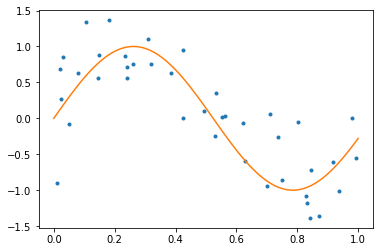

In [152]:
plt.plot(Xs,Ys,'.')
plt.plot(xs,ys)
plt.show()

In this section, we try to learn the function $f_*$ from the $n$ samples. We start with empirical risk minimization over the set of linear functions. 

(3) What are here the input space $\mathcal{X}$ of the linear regression? What is the output space $\mathcal{Y}$? What is the risk $R(f)$ of a classifier $f:\mathcal{X} \to \mathcal{Y}$ in terms of $\sigma$? What is the optimal classifier among all $L^2$ functions $f:\mathcal{X} \to \mathcal{Y}$? (Here optimal means that it minimizes the risk $R(f)$.) What is the risk of the optimal classifier?

\begin{align*}
R(f) &= \mathbb{E}_{(X,Y)}\left[(Y-f(X))^2\right] = \mathbb{E}\left[(f_*(X)+\sigma\varepsilon - f(X))^2\right] \\
&= \mathbb{E}\left[(f_*(X)-f(X))^2\right] + 2\sigma\mathbb{E}\left[\varepsilon(f_*(X)-f(X))\right] + \sigma^2 \mathbb{E}\left[\varepsilon^2\right] \, .
\end{align*}
The second term vanishes because $\varepsilon$ is centered and independent of $X$. We thus get 
\begin{equation*}
R(f) = \int_0^1(f_*(x)-f(x))^2 \mathrm{d}x + \sigma^2 = \Vert f_*-f \Vert_{L^2([0,1],\mathrm{d}x)}^2 + \sigma^2 \, .
\end{equation*}
From this formula, it is clear that the optimal classifier is $f_*$ with risk $R(f_*) = \sigma^2$.

The empirical risk minimization over the set of linear function means that we estimate
$$ \hat{f} = {\rm argmin}_{f \in F} \hat{R}_n(f) $$ 
where 
$$ F = \{f(x) = \theta_1 x + \theta_0 | \theta_0, \theta_1 \in \mathbb{R}\} \, , $$
$$ \hat{R}_n(f) = \frac{1}{n} \sum_{i=1}^{n} (y_i - f(x_i))^2 \, .$$

(4) Writing $\hat{f}(x) = \theta_1 x + \theta_0$, find a closed-from formula for $\theta_0$, $\theta_1$ in terms of the observations $(x_i,y_i)$.

We write the risk $\hat{R}_n(f)$ in term of $\theta_0, \theta_1$ directly:
$$ \hat{R}_n(\theta_0,\theta_1) = \frac{1}{n} \sum_{i=1}^n (y_i-\theta_0-\theta_1x_i)^2 \, .$$ 
This is a non-negative quadratic in $(\theta_0, \theta_1)$, thus the optimum is reached when the gradient vanishes. A few lines of computation give the formula
$$ \theta_1 = \frac{\frac{1}{n}\sum y_ix_i - \frac{1}{n^2}\sum y_i \sum x_i}{\frac{1}{n}\sum x_i^2 - \left(\frac{1}{n}\sum x_i\right)^2} \, ,$$
$$ \theta_0 = \frac{1}{n} \sum y_i - \left(\frac{1}{n}\sum x_i\right)\theta_1 .$$

(5) Using this formula, complete the previous plot with this estimator.

In [153]:
sumx = sum(Xs)/n
sumy = sum(Ys)/n
sumxy = sum(Xs*Ys)/n
sumxx = sum(Xs*Xs)/n
theta_1 = (sumxy-sumx*sumy)/(sumxx-sumx**2)
theta_0 = sumy - sumx * theta_1

In [154]:
xs2 = np.array([0,1])
ys2 = theta_1*xs2 + theta_0

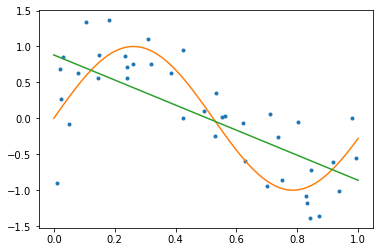

In [155]:
plt.plot(Xs,Ys,'.')
plt.plot(xs,ys)
plt.plot(xs2, ys2)
plt.show()

(6) Repeat the computation of the coefficients, using now the function `numpy.linalg.lstsq` . Check on the plot that the results are the same.

In [156]:
X = np.array([np.ones(n),Xs]).T

In [157]:
theta,_,_,_ = np.linalg.lstsq(X,Ys, rcond=None)

In [158]:
ys3 = X@theta

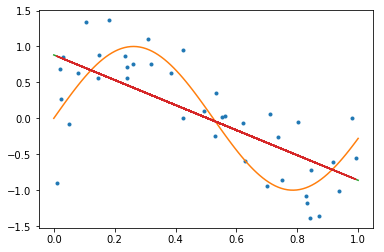

In [159]:
plt.plot(Xs,Ys,'.')
plt.plot(xs,ys)
plt.plot(xs2,ys2)
plt.plot(Xs,ys3)
plt.show()

(7) Minimize the empirical risk over the set of polynomials of order 2. Plot the optimal polynomial.

In [160]:
X = np.array([np.ones(n),Xs,Xs**2]).T
theta,_,_,_ = np.linalg.lstsq(X,Ys, rcond=None)
ys4 = (np.array([np.ones(100),xs,xs**2]).T)@theta

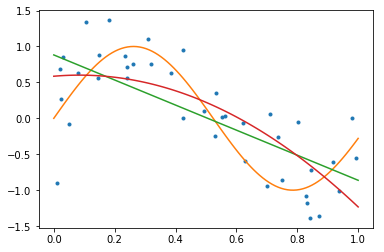

In [161]:
plt.plot(Xs,Ys,'.')
plt.plot(xs,ys)
plt.plot(xs2,ys2)
plt.plot(xs,ys4)
plt.show()